In [1]:
import sys
sys.path.append('../')
from cardiac_evalfunctions import *
import active_dynamicmemory.runutils as rutils
import matplotlib
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

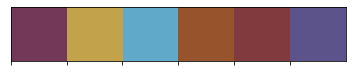

In [2]:
mapname = 'romaO'

cm_data = np.loadtxt(f"/home/mperkonigg/Documents/ScientificColourMaps6/{mapname}/{mapname}.txt")
colormap = LinearSegmentedColormap.from_list('scientific_cm', cm_data)
#x = np.linspace(0, 100, 25)[None, :]
#plt.imshow(x, aspect='auto',cmap=colormap)
#plt.axis('off')
#plt.show()
colormap = ListedColormap([cm_data[0], cm_data[85],cm_data[180], cm_data[45], cm_data[20], cm_data[227]], name='scientific_cm')
matplotlib.cm.register_cmap(cmap=colormap, name='scientific_cm')
sns.set_palette('scientific_cm')
sns.palplot(sns.color_palette())

GE
Philips
Canon


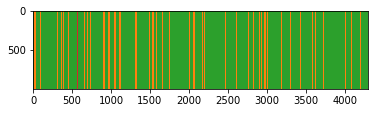

In [5]:
with open('../training_configs/ablation_cardiac/cardiac_casa_10_random.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

ds = CardiacContinuous(params['trainparams']['datasetfile'], seed=1, random=True, order=['Siemens', 'GE', 'Philips', 'Canon'])
res = ds.df.scanner == params['trainparams']['order'][0]
for j, s in enumerate(params['trainparams']['order'][1:]):
    print(s)
    res[ds.df.scanner == s] = j+2

plt.imshow(np.tile(res,(1000,1)), cmap=ListedColormap(sns.color_palette()[:4]))

In [6]:
ds.df.groupby('scanner').count()

,filepath,t,slice,split,slicepath
scanner,,,,,
Canon,758,758,758,758,758
GE,720,720,720,720,720
Philips,2206,2206,2206,2206,2206
Siemens,614,614,614,614,614


In [3]:
round(4298/20), round(4298/10), round(4298/8), round(4298/5)  

(215, 430, 537, 860)

To see the dynamics during training validation curves can be plotted by calling `plot_validation_curves(<path_to_config_files>, [optional <list of method names>], [optional <list of random seeds>])`.
Note: Plotting those curves is only useful for methods trained on a continuous datastream

['Siemens', 'GE', 'Philips', 'Canon']


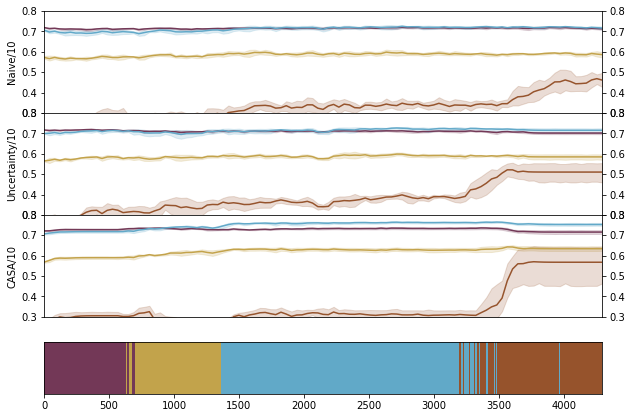

In [3]:
plot_validation_curves(['../training_configs/cardiac_naive_10.yml',
                                '../training_configs/cardiac_uncertainty_10.yml',
                                '../training_configs/cardiac_casa_10.yml'], 
                               names=['Naive/10','Uncertainty/10', 'CASA/10'], seeds=[1, 2, 3, 4, 5])

['Siemens', 'GE', 'Philips', 'Canon']


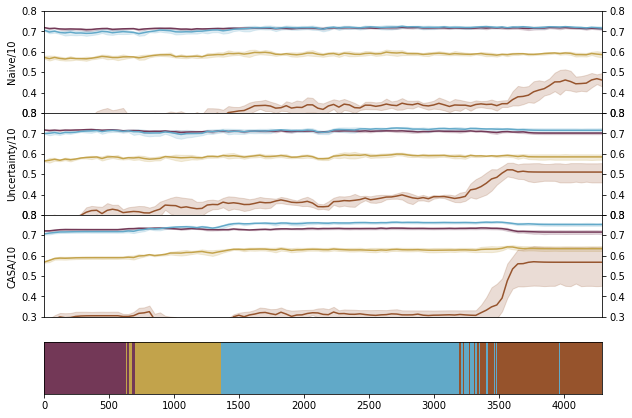

In [3]:
plot_validation_curves(['../training_configs/cardiac_naive_10.yml',
                                '../training_configs/cardiac_uncertainty_10.yml',
                                '../training_configs/cardiac_casa_10.yml'], 
                               names=['Naive/10','Uncertainty/10', 'CASA/10'], seeds=[1, 2, 3, 4, 5])

['Siemens', 'GE', 'Philips', 'Canon']


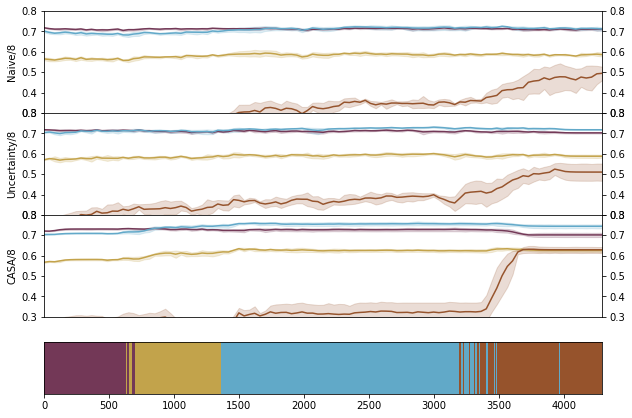

In [6]:
plot_validation_curves(['../training_configs/cardiac_naive_8.yml',
                                '../training_configs/cardiac_uncertainty_8.yml',
                                '../training_configs/cardiac_casa_8.yml'], 
                               names=['Naive/8','Uncertainty/8', 'CASA/8'], seeds=[1, 2, 3, 4, 5])

To evaluate a specific config call `eval_config(<path_to_config_file>)`.

Results are cached to avoid recalculation.

In [10]:
eval_config('../training_configs/cardiac_base.yml').round(3)

,scanner,dice_lv,dice_myo,dice_rv,dice_mean
0,Canon,0.420,0.386,0.220,0.340
1,GE,0.763,0.660,0.725,0.690
2,Philips,0.780,0.696,0.793,0.718
3,Siemens,0.880,0.783,0.810,0.814


In [8]:
df = eval_config('../training_configs/cardiac_joint.yml', seeds=[1, 2, 3, 4, 5])
df.groupby('scanner').agg({'dice_lv': ['mean', 'std'], 'dice_myo': ['mean', 'std'], 'dice_rv': ['mean', 'std'], 'dice_mean': ['mean', 'std']}).round(3)

dice_lv        dice_myo        dice_rv        dice_mean       
           mean    std     mean    std    mean    std      mean    std
scanner                                                               
Canon     0.904  0.012    0.807  0.017   0.806  0.021     0.825  0.016
GE        0.816  0.012    0.736  0.023   0.797  0.042     0.758  0.020
Philips   0.869  0.012    0.794  0.026   0.851  0.017     0.818  0.023
Siemens   0.909  0.005    0.794  0.007   0.798  0.034     0.828  0.009

In [38]:
eval_config('../training_configs/cardiac_naive_5.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.004847,0.003016,0.004740,NaN,0.004201,3
Canon,0.739659,0.643677,0.561608,0.637496,0.645610,3
FWT,0.102412,0.089595,0.092670,NaN,0.094892,3
GE,0.758320,0.655258,0.753680,0.694495,0.715438,3
Philips,0.824466,0.727272,0.806327,0.756009,0.778518,3
Siemens,0.888171,0.792459,0.799212,0.815509,0.823838,3


In [39]:
eval_config('../training_configs/cardiac_naive_8.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.004890,0.000861,0.000183,NaN,0.001978,3
Canon,0.747996,0.638267,0.505964,0.624578,0.629201,3
FWT,0.102820,0.089011,0.081220,NaN,0.091017,3
GE,0.754320,0.650379,0.738511,0.686953,0.707541,3
Philips,0.820293,0.719740,0.804950,0.751547,0.774133,3
Siemens,0.882590,0.788893,0.797726,0.811088,0.820074,3


In [42]:
eval_config('../training_configs/cardiac_naive_20.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.001407,-0.001335,0.000336,NaN,-0.000802,3
Canon,0.701574,0.617681,0.542512,0.610517,0.618071,3
FWT,0.085030,0.076260,0.087272,NaN,0.082854,3
GE,0.747850,0.646706,0.742037,0.684842,0.705359,3
Philips,0.789870,0.696412,0.797321,0.725982,0.752396,3
Siemens,0.882542,0.789185,0.798130,0.811625,0.820371,3


In [45]:
eval_config('../training_configs/cardiac_naive_10.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.005056,-0.005781,-0.000298,NaN,-0.003712,3
Canon,0.668783,0.579406,0.447344,0.560048,0.563895,3
FWT,0.066410,0.057738,0.057212,NaN,0.060453,3
GE,0.755860,0.648188,0.737679,0.686197,0.706981,3
Philips,0.800991,0.705737,0.803468,0.735647,0.761460,3
Siemens,0.882441,0.788702,0.795331,0.810425,0.819225,3


In [30]:
eval_config('../training_configs/cardiac_casa_20.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.006687,0.005323,0.000787,NaN,0.004266,3
Canon,0.462052,0.394091,0.217579,0.353024,0.356686,3
FWT,0.025432,0.039752,0.017294,NaN,0.027493,3
GE,0.829756,0.739424,0.753361,0.762412,0.771239,3
Philips,0.864894,0.799940,0.817920,0.822001,0.826189,3
Siemens,0.873955,0.775747,0.803640,0.807955,0.815324,3


In [36]:
eval_config('../training_configs/cardiac_casa_5.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.001616,-0.005078,-0.003854,NaN,-0.003516,3
Canon,0.865163,0.752654,0.726952,0.763785,0.777139,3
FWT,0.117124,0.125962,0.141214,NaN,0.128100,3
GE,0.838230,0.750322,0.765436,0.774207,0.782049,3
Philips,0.865144,0.808347,0.819769,0.825596,0.829714,3
Siemens,0.860750,0.754454,0.777750,0.788902,0.795464,3


In [34]:
eval_config('../training_configs/cardiac_casa_10.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.001591,-0.001765,-0.000931,NaN,-0.000368,3
Canon,0.789348,0.680364,0.591964,0.675363,0.684260,3
FWT,0.091677,0.100785,0.103867,NaN,0.098777,3
GE,0.834779,0.750087,0.772555,0.774480,0.782975,3
Philips,0.873532,0.813372,0.815859,0.829806,0.833142,3
Siemens,0.869346,0.766502,0.780850,0.797868,0.803642,3


In [9]:
eval_config('../training_configs/cardiac_casa_10.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.001764,-0.006666,-0.010834,NaN,-0.006422,3
Canon,0.760379,0.678622,0.592796,0.670346,0.675536,3
FWT,0.081582,0.088096,0.089631,NaN,0.086436,3
GE,0.780653,0.684598,0.746288,0.712264,0.730951,3
Philips,0.846210,0.765843,0.814214,0.786532,0.803200,3
Siemens,0.891365,0.775616,0.773811,0.805820,0.811653,3


In [13]:
eval_config('../training_configs/cardiac_uncertainty_10.yml', seeds=[1,2,3,4,5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.000615,-0.002023,-0.007218,NaN,-0.003285,3
Canon,0.767085,0.656564,0.538361,0.644422,0.651608,3
FWT,0.069224,0.059550,0.070986,NaN,0.066586,3
GE,0.743903,0.639289,0.736296,0.678983,0.699618,3
Philips,0.806444,0.709618,0.799081,0.739665,0.763702,3
Siemens,0.884110,0.787833,0.785817,0.808042,0.816450,3


In [35]:
eval_config('../training_configs/cardiac_casa_8.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.000776,-0.004950,-0.015385,NaN,-0.006520,3
Canon,0.866117,0.748658,0.702203,0.756050,0.768257,3
FWT,0.126673,0.129407,0.132956,NaN,0.129679,3
GE,0.835242,0.746624,0.750084,0.768334,0.775071,3
Philips,0.865420,0.805393,0.803881,0.820569,0.823816,3
Siemens,0.860933,0.754338,0.759321,0.784568,0.789790,3


In [59]:
eval_config('../training_configs/cardiac_uncertainty_5.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicess

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.013907,-0.030762,-0.016244,NaN,-0.020304,3
Canon,0.894118,0.777164,0.768269,0.792498,0.808012,3
FWT,0.074334,0.085918,0.132447,NaN,0.097566,3
GE,0.813018,0.705136,0.758203,0.740686,0.754261,3
Philips,0.851647,0.769582,0.797247,0.800485,0.804740,3
Siemens,0.823437,0.705242,0.733572,0.746151,0.752101,3


In [5]:
eval_config('../training_configs/cardiac_uncertainty_8.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_6c45967510
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_6c45967510.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_6c45967510.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_48db10f5d7
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_48db10f5d7.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_48db10f5d7.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicess

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.000536,-0.003399,-0.002602,NaN,-0.002179,3
Canon,0.758538,0.649420,0.534214,0.638966,0.645285,3
FWT,0.071265,0.061735,0.076117,NaN,0.069706,3
GE,0.741088,0.637135,0.741036,0.678328,0.699397,3
Philips,0.816085,0.716871,0.804613,0.748665,0.771558,3
Siemens,0.888460,0.789506,0.789207,0.811284,0.819614,3


In [125]:
eval_config('../training_configs/cardiac_siemens.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,seed
scanner,,,,,
Canon,0.047,0.037,0.121,0.057,1.581
GE,0.012,0.013,0.020,0.015,1.581
Philips,0.009,0.006,0.010,0.007,1.581
Siemens,0.010,0.007,0.018,0.005,1.581


In [126]:
eval_config('../training_configs/cardiac_ge.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,seed
scanner,,,,,
Canon,0.113,0.070,0.026,0.071,1.581
GE,0.018,0.020,0.025,0.017,1.581
Philips,0.029,0.028,0.050,0.031,1.581
Siemens,0.019,0.014,0.060,0.027,1.581


In [127]:
eval_config('../training_configs/cardiac_philips.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,seed
scanner,,,,,
Canon,0.093,0.062,0.125,0.086,1.581
GE,0.054,0.052,0.063,0.050,1.581
Philips,0.016,0.024,0.051,0.025,1.581
Siemens,0.017,0.011,0.048,0.015,1.581


In [128]:
eval_config('../training_configs/cardiac_canon.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,seed
scanner,,,,,
Canon,0.003,0.006,0.008,0.004,1.581
GE,0.053,0.027,0.049,0.032,1.581
Philips,0.016,0.009,0.025,0.009,1.581
Siemens,0.015,0.008,0.038,0.016,1.581


To evaluate multiple configs at once and get an overview call `eval_config_list(<path_to_config_files>, <list of method names>, [optional <list of random seeds>])`

In [38]:
df_overview = eval_config_list(['../training_configs/cardiac_naive_5.yml', '../training_configs/cardiac_naive_8.yml', 
                                '../training_configs/cardiac_naive_10.yml', '../training_configs/cardiac_naive_20.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',
                                '../training_configs/cardiac_casa_5.yml',  '../training_configs/cardiac_casa_8.yml',  
                                '../training_configs/cardiac_casa_10.yml',  '../training_configs/cardiac_casa_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20', 'Uncertainty/5', 'CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
CASA/10,0.812,0.731,0.803,0.676,-0.006,0.086
CASA/20,0.824,0.741,0.785,0.379,0.002,0.019
CASA/5,0.807,0.716,0.803,0.778,-0.012,0.116
CASA/8,0.795,0.712,0.793,0.774,-0.017,0.119
Naive/10,0.819,0.707,0.761,0.564,-0.004,0.060
Naive/20,0.820,0.705,0.752,0.618,-0.001,0.083
Naive/5,0.824,0.715,0.779,0.646,0.004,0.095
Naive/8,0.820,0.708,0.774,0.629,0.002,0.091
Uncertainty/5,0.823,0.705,0.780,0.689,0.039,0.041


In [14]:
df_overview = eval_config_list(['../training_configs/cardiac_uncertainty_5_ri.yml',
                                '../training_configs/cardiac_uncertainty_5.yml'], 
                               ['Unc RI/5', 'Unc/5'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_50f8a2dae2
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_50f8a2dae2.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_50f8a2dae2.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicess

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
Unc RI/5,0.778,0.682,0.782,0.821,-0.024,0.097
Unc/5,0.823,0.705,0.780,0.689,0.039,0.041


In [15]:
with open('../training_configs/cardiac_uncertainty_5.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
model, logs, df_memory, exp_name = rutils.trained_model(params['trainparams'], params['settings'], training=False)

cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad.pt
True True


In [16]:
df_memory.groupby('scanner').count()

,filepath,pseudodomain,target
scanner,,,
Canon,2,0,2
Philips,1,0,1
Siemens,125,125,125


In [4]:
df_overview = eval_config_list(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_uncertainty.yml', '../training_configs/cardiac_casa.yml'], 
                               ['Naive', 'Uncertainty', 'DM'])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
DM,0.806,0.791,0.841,0.762,-0.001,0.114
Naive,0.806,0.750,0.801,0.570,0.009,0.082
Uncertainty,0.828,0.706,0.792,0.710,0.005,0.091


In [4]:
eval_config('../training_configs/cardiac_casa_5.yml') #transform, interval 100

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_d7b7bbb93e
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_d7b7bbb93e.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_d7b7bbb93e.pt
True True


,scanner,shift,dice_lv,dice_myo,dice_rv,dice_mean,mean
2,Canon,None,0.865764,0.757120,0.739560,0.772778,0.783806
6,GE,None,0.772458,0.667825,0.771372,0.709058,0.730178
10,Philips,None,0.841710,0.771114,0.818426,0.789845,0.805274
14,Siemens,None,0.907797,0.793269,0.797445,0.826001,0.831128
0,BWT,None,0.005927,0.002763,-0.000430,NaN,0.002753
1,FWT,None,0.098759,0.105199,0.133438,NaN,0.112465


In [8]:
eval_config('../training_configs/cardiac_casa_5.yml') #transform, interval 100

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_7691de61f1
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_7691de61f1.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_7691de61f1.pt
True True


,scanner,shift,dice_lv,dice_myo,dice_rv,dice_mean,mean
2,Canon,None,0.889367,0.791679,0.761247,0.801796,0.811022
6,GE,None,0.765948,0.619278,0.705967,0.673568,0.691190
10,Philips,None,0.857746,0.777999,0.816213,0.801629,0.813397
14,Siemens,None,0.891922,0.761256,0.762170,0.797293,0.803160
0,BWT,None,-0.000062,-0.027519,-0.028027,NaN,-0.018536
1,FWT,None,0.126740,0.133150,0.138004,NaN,0.132631


In [5]:
eval_config('../training_configs/cardiac_casa_20.yml')

,scanner,shift,dice_lv,dice_myo,dice_rv,dice_mean,mean
2,Canon,None,0.508671,0.445013,0.250893,0.401051,0.401407
6,GE,None,0.781358,0.678006,0.755462,0.711071,0.731474
10,Philips,None,0.813258,0.733193,0.815183,0.754660,0.779073
14,Siemens,None,0.911673,0.803986,0.813161,0.835408,0.841057
0,BWT,None,-0.000623,0.000135,-0.000627,NaN,-0.000371
1,FWT,None,-0.003793,-0.000316,0.000128,NaN,-0.001327


In [6]:
eval_config('../training_configs/cardiac_casa_20.yml')

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_471f22c0b0
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_471f22c0b0.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_471f22c0b0.pt
True True


,scanner,shift,dice_lv,dice_myo,dice_rv,dice_mean,mean
2,Canon,None,0.443285,0.368820,0.228886,0.349449,0.347610
6,GE,None,0.787684,0.688410,0.727997,0.712296,0.729097
10,Philips,None,0.816100,0.731909,0.808168,0.757000,0.778294
14,Siemens,None,0.905108,0.796090,0.802948,0.825609,0.832439
0,BWT,None,0.001362,0.000086,-0.003073,NaN,-0.000542
1,FWT,None,-0.010685,0.000551,-0.008941,NaN,-0.006358


# FINAL

In [3]:
df_overview = eval_config_list(['../training_configs/cardiac_naive_5.yml', '../training_configs/cardiac_naive_8.yml', 
                                '../training_configs/cardiac_naive_10.yml', '../training_configs/cardiac_naive_20.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',  '../training_configs/cardiac_uncertainty_8.yml',
                                 '../training_configs/cardiac_uncertainty_10.yml',  '../training_configs/cardiac_uncertainty_20.yml',
                                '../training_configs/cardiac_casa_5.yml',  '../training_configs/cardiac_casa_8.yml',  
                                '../training_configs/cardiac_casa_10.yml',  '../training_configs/cardiac_casa_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20', 'Uncertainty/5','Uncertainty/8', 'Uncertainty/10', 'Uncertainty/20', 'CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
CASA/10,0.812,0.731,0.803,0.676,-0.006,0.086
CASA/20,0.824,0.741,0.785,0.379,0.002,0.019
CASA/5,0.807,0.716,0.803,0.778,-0.012,0.116
CASA/8,0.795,0.712,0.793,0.774,-0.017,0.119
Naive/10,0.819,0.707,0.761,0.564,-0.004,0.060
Naive/20,0.820,0.705,0.752,0.618,-0.001,0.083
Naive/5,0.824,0.715,0.779,0.646,0.004,0.095
Naive/8,0.820,0.708,0.774,0.629,0.002,0.091
Uncertainty/10,0.816,0.700,0.764,0.652,-0.003,0.067


In [3]:
df_overview = eval_config_list(['../training_configs/cardiac_naive_5.yml', '../training_configs/cardiac_naive_8.yml', 
                                '../training_configs/cardiac_naive_10.yml', '../training_configs/cardiac_naive_20.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',  '../training_configs/cardiac_uncertainty_8.yml',
                                 '../training_configs/cardiac_uncertainty_10.yml',  '../training_configs/cardiac_uncertainty_20.yml',
                                '../training_configs/cardiac_casa_5.yml',  '../training_configs/cardiac_casa_8.yml',  
                                '../training_configs/cardiac_casa_10.yml',  '../training_configs/cardiac_casa_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20', 'Uncertainty/5','Uncertainty/8', 'Uncertainty/10', 'Uncertainty/20', 'CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'],
                               seeds=[1, 2, 3, 4, 5], value='std')
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
CASA/10,0.017,0.025,0.015,0.158,0.009,0.046
CASA/20,0.005,0.011,0.022,0.100,0.006,0.031
CASA/5,0.010,0.012,0.006,0.030,0.003,0.016
CASA/8,0.011,0.018,0.007,0.013,0.007,0.006
Naive/10,0.003,0.005,0.013,0.064,0.003,0.026
Naive/20,0.005,0.007,0.014,0.060,0.008,0.014
Naive/5,0.006,0.009,0.010,0.087,0.006,0.036
Naive/8,0.004,0.011,0.007,0.061,0.005,0.023
Uncertainty/10,0.006,0.009,0.023,0.078,0.013,0.031


In [9]:
configfiles = ['../training_configs/cardiac_naive_5.yml', '../training_configs/cardiac_naive_8.yml', 
                                '../training_configs/cardiac_naive_10.yml', '../training_configs/cardiac_naive_20.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',  '../training_configs/cardiac_uncertainty_8.yml',
                                 '../training_configs/cardiac_uncertainty_10.yml',  '../training_configs/cardiac_uncertainty_20.yml',
                                '../training_configs/cardiac_casa_5.yml',  '../training_configs/cardiac_casa_8.yml',  
                                '../training_configs/cardiac_casa_10.yml',  '../training_configs/cardiac_casa_20.yml']
names = ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20', 'Uncertainty/5','Uncertainty/8', 'Uncertainty/10', 'Uncertainty/20', 'CASA/5', 'CASA/8', 'CASA/10', 'CASA/20']
seeds = [1, 2, 3, 4, 5]

df_overall = pd.DataFrame()
for k, configfile in enumerate(configfiles):
    df_conf = eval_config(configfile, seeds, names[k])
    df_overall = df_overall.append(df_conf)

df_overall = df_overall.pivot(index=['model', 'seed'], columns='scanner', values='mean').round(3).reset_index()
df_overall['method'] = [m.split('/')[0] for m in df_overall.model]
df_overall['lb'] = [m.split('/')[1] for m in df_overall.model]

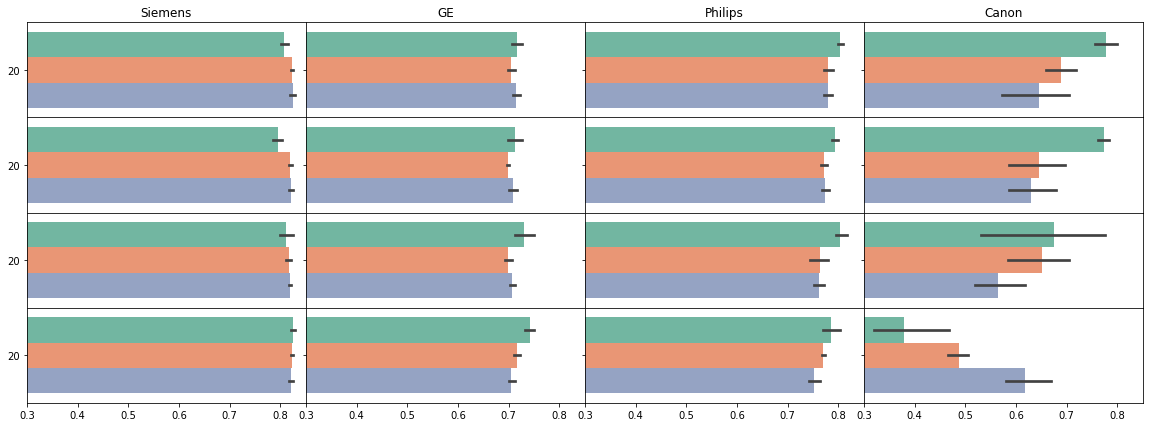

In [11]:
fig, ax = plt.subplots(4, 4, figsize=(20, 7), sharey=True, sharex=True)
plt.subplots_adjust(wspace = .0, hspace=.0)

sns.set_palette(sns.color_palette('Set2'))

for r, budget in enumerate(['5', '8', '10', '20']):

    df_temp = df_overall.loc[df_overall.lb==budget]

    sns.barplot(data=df_temp, x='Siemens', y='lb', hue='method', orient='h', ax=ax[r][0], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][0].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][0].set_title('Siemens')
    ax[r][0].set_ylabel('')
    ax[r][0].get_legend().remove()
    ax[r][0].set_xlabel('')
    #ax[r][0].set_xticks([''])

    sns.barplot(data=df_temp, x='GE', y='lb', hue='method', orient='h', ax=ax[r][1], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][1].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][1].set_title('GE')
    ax[r][1].get_legend().remove()
    ax[r][1].set_ylabel('')
    ax[r][1].set_xlabel('')


    sns.barplot(data=df_temp, x='Philips', y='lb', hue='method', orient='h', ax=ax[r][2], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][2].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][2].set_title('Philips')
    ax[r][2].get_legend().remove()
    ax[r][2].set_ylabel('')
    ax[r][2].set_xlabel('')

    sns.barplot(data=df_temp, x='Canon', y='lb', hue='method', orient='h', ax=ax[r][3], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][3].set_xlim([0.3, 0.85])
    if r==0:
        ax[r][3].set_title('Canon')
    ax[r][3].get_legend().remove()
    ax[r][3].set_ylabel('')
    ax[r][3].set_xlabel('')
fig.savefig('/project/catinous/active_catinous/MELBA/output/results/labelling_budget_newcolors.pdf')

## different MEM sizes

In [12]:
split='test'
df = pd.DataFrame()
seeds = [1, 2, 3, 4, 5]

with open(f'../training_configs/cardiac_casa_10.yml') as f: #cardiac_casa_5, cardiac_casa_10
    params = yaml.load(f, Loader=yaml.FullLoader)
for mem_size in [64, 256, 512, 128, 1024]:
    params['trainparams']['memorymaximum'] = mem_size

    for i, seed in enumerate(seeds):
        params['trainparams']['seed'] = seed
        params['trainparams']['run_postfix'] = seed
        df_temp = eval_params(params, split=split)
        df_temp['seed'] = seed
        df_temp['mem_size'] = mem_size
        df_temp['method'] = 'CASA'
        df = df.append(df_temp)
        
with open(f'../training_configs/cardiac_naive_10.yml') as f: #cardiac_casa_5, cardiac_casa_10
    params = yaml.load(f, Loader=yaml.FullLoader)
for mem_size in [64, 256, 512, 128, 1024]:
    params['trainparams']['memorymaximum'] = mem_size

    for i, seed in enumerate(seeds):
        params['trainparams']['seed'] = seed
        params['trainparams']['run_postfix'] = seed
        df_temp = eval_params(params, split=split)
        df_temp['seed'] = seed
        df_temp['mem_size'] = mem_size
        df_temp['method'] = 'Naive'
        df = df.append(df_temp)
        
with open(f'../training_configs/cardiac_uncertainty_10.yml') as f: #cardiac_casa_5, cardiac_casa_10
    params = yaml.load(f, Loader=yaml.FullLoader)
for mem_size in [64, 256, 512, 128, 1024]:
    params['trainparams']['memorymaximum'] = mem_size

    for i, seed in enumerate(seeds):
        params['trainparams']['seed'] = seed
        params['trainparams']['run_postfix'] = seed
        df_temp = eval_params(params, split=split)
        df_temp['seed'] = seed
        df_temp['mem_size'] = mem_size
        df_temp['method'] = 'Uncertainty'
        df = df.append(df_temp)

df=df.loc[df.scanner!='BWT']
df=df.loc[df.scanner!='FWT']

<AxesSubplot:xlabel='mem_size', ylabel='mean'>

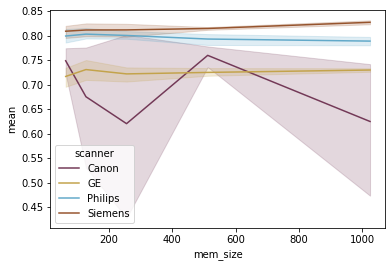

In [7]:
sns.lineplot(data=df, x='mem_size', y='mean', hue='scanner')

In [ ]:
    df_temp = df_overall.loc[df_overall.lb==budget]


In [14]:
df_piv = pd.pivot_table(df, values='mean', columns='scanner', index=['mem_size', 'seed', 'method']).reset_index()

In [15]:
df_piv.groupby(['mem_size', 'method']).mean()

scanner               seed     Canon        GE   Philips   Siemens
mem_size method                                                   
64       CASA            3  0.748917  0.716927  0.799373  0.809164
         Naive           3  0.744984  0.723642  0.813553  0.819664
         Uncertainty     3  0.742252  0.706956  0.792837  0.803373
128      CASA            3  0.675536  0.730951  0.803200  0.811653
         Naive           3  0.563895  0.706981  0.761460  0.819225
         Uncertainty     3  0.651608  0.699618  0.763702  0.816450
256      CASA            3  0.620659  0.722124  0.800505  0.811821
         Naive           3  0.547670  0.726404  0.797085  0.833119
         Uncertainty     3  0.590359  0.714036  0.788717  0.821523
512      CASA            3  0.759934  0.725142  0.793213  0.814752
         Naive           3  0.503071  0.726722  0.789292  0.833872
         Uncertainty     3  0.551082  0.722383  0.792811  0.831112
1024     CASA            3  0.625082  0.730003  0.788989  0.827316
         Naive           3  0.458255  0.727992  0.775636  0.829857
         Uncertainty     3  0.522947  0.720761  0.784032  0.828930

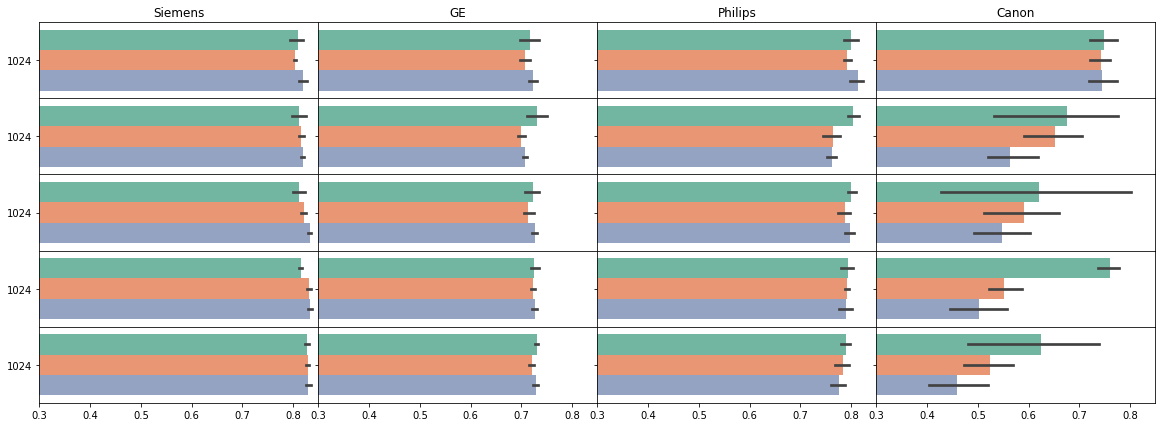

In [17]:
fig, ax = plt.subplots(5, 4, figsize=(20, 7), sharey=True, sharex=True)
plt.subplots_adjust(wspace = .0, hspace=.0)

for r, mem_size in enumerate([64, 128, 256, 512, 1024]):

    df_temp = df_piv.loc[df_piv.mem_size==mem_size]

    sns.barplot(data=df_temp, x='Siemens', y='mem_size', hue='method', orient='h', ax=ax[r][0], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][0].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][0].set_title('Siemens')
    ax[r][0].set_ylabel('')
    ax[r][0].get_legend().remove()
    ax[r][0].set_xlabel('')
    #ax[r][0].set_xticks([''])

    sns.barplot(data=df_temp, x='GE', y='mem_size', hue='method', orient='h', ax=ax[r][1], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][1].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][1].set_title('GE')
    ax[r][1].get_legend().remove()
    ax[r][1].set_ylabel('')
    ax[r][1].set_xlabel('')


    sns.barplot(data=df_temp, x='Philips', y='mem_size', hue='method', orient='h', ax=ax[r][2], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][2].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][2].set_title('Philips')
    ax[r][2].get_legend().remove()
    ax[r][2].set_ylabel('')
    ax[r][2].set_xlabel('')

    sns.barplot(data=df_temp, x='Canon', y='mem_size', hue='method', orient='h', ax=ax[r][3], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][3].set_xlim([0.3, 0.85])
    if r==0:
        ax[r][3].set_title('Canon')
    ax[r][3].get_legend().remove()
    ax[r][3].set_ylabel('')
    ax[r][3].set_xlabel('')
fig.savefig('/project/catinous/active_catinous/MELBA/output/results/memory_size_newcolor.pdf')

Text(0, 0.5, '')

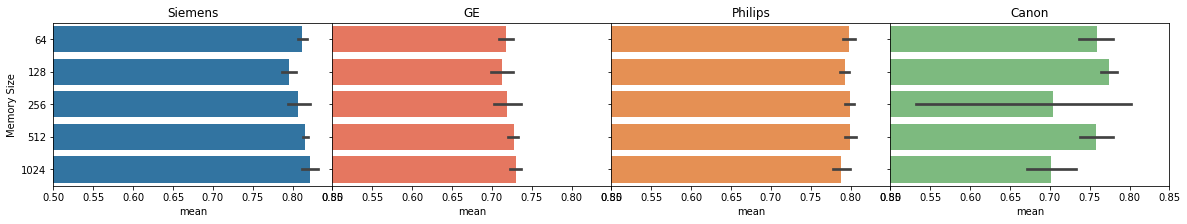

In [165]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3), sharey=True)
plt.subplots_adjust(wspace = .0)

sns.barplot(data=df.loc[df.scanner=='Siemens'], x='mean', y='mem_size', hue='scanner', orient='h', ax=ax[0])
ax[0].set_xlim([0.5, 0.85])
ax[0].set_title('Siemens')
ax[0].set_ylabel('Memory Size')

ax[0].get_legend().remove()

sns.barplot(data=df.loc[df.scanner=='GE'], x='mean', y='mem_size', hue='scanner',  orient='h', ax=ax[1], palette='Reds')
ax[1].set_xlim([0.5, 0.85])
ax[1].set_title('GE')
ax[1].get_legend().remove()
ax[1].set_ylabel('')

sns.barplot(data=df.loc[df.scanner=='Philips'], x='mean', y='mem_size', hue='scanner', orient='h', ax=ax[2],  palette='Oranges')
ax[2].set_xlim([0.5, 0.85])
ax[2].set_title('Philips')
ax[2].get_legend().remove()
ax[2].set_ylabel('')


sns.barplot(data=df.loc[df.scanner=='Canon'], x='mean', y='mem_size', hue='scanner', orient='h', ax=ax[3],  palette='Greens')
ax[3].set_xlim([0.5, 0.85])
ax[3].set_title('Canon')
ax[3].get_legend().remove()
ax[3].set_ylabel('')

In [123]:
with open('../training_configs/cardiac_casa_10.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    
memdir = params['settings']['TRAINED_MEMORY_DIR']
params['trainparams']['memorymaximum'] = 256
print(params['trainparams']['startbudget'])


for i in range(5):
    params['trainparams']['seed'] = i+1
    params['trainparams']['run_postfix'] = i+1

    expname = rutils.get_expname(params['trainparams'])

    df = pd.read_csv(f'{memdir}/{expname}.csv')
    print(df.groupby(['scanner']).count())
    
    print(df.groupby(['pseudodomain']).count())

    with open(f'{memdir}/{expname}.txt') as f:
        print(f.readlines())

430
         filepath  pseudodomain  target
scanner                                
GE             72            72      72
Philips       105           105     105
Siemens        79            79      79
              filepath  scanner  target
pseudodomain                           
0                   43       43      43
1                   33       33      33
2                   95       95      95
3                   42       42      42
4                   29       29      29
5                   14       14      14
['train counter: 351\n', 'label counter: 430']
         filepath  pseudodomain  target
scanner                                
GE            113           113     113
Philips        57            57      57
Siemens        86            86      86
              filepath  scanner  target
pseudodomain                           
0                   40       40      40
1                   44       44      44
2                   47       47      47
3                   38       

## memory analysis

In [4]:
with open('../training_configs/cardiac_casa_10.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    
memdir = params['settings']['TRAINED_MEMORY_DIR']

print(params['trainparams']['startbudget'])


for i in range(5):
    params['trainparams']['seed'] = i+1
    params['trainparams']['run_postfix'] = i+1

    expname = rutils.get_expname(params['trainparams'])

    df = pd.read_csv(f'{memdir}/{expname}.csv')
    print(df.groupby(['scanner']).count())
    
    print(df.groupby(['pseudodomain']).count())

    with open(f'{memdir}/{expname}.txt') as f:
        print(f.readlines())

430
         filepath  pseudodomain  target
scanner                                
GE             56            56      56
Philips        42            42      42
Siemens        30            30      30
              filepath  scanner  target
pseudodomain                           
0                    7        7       7
1                   21       21      21
2                   33       33      33
3                   22       22      22
4                   22       22      22
5                   23       23      23
['train counter: 246\n', 'label counter: 430']
         filepath  pseudodomain  target
scanner                                
Canon          16            16      16
GE             22            22      22
Philips        56            56      56
Siemens        34            34      34
              filepath  scanner  target
pseudodomain                           
0                   17       17      17
1                   16       16      16
2                   17       

## random stream

In [4]:
eval_config('../training_configs/ablation_cardiac/cardiac_casa_10_random.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.020,0.017,0.000,NaN,0.012,3
Canon,0.806,0.714,0.616,0.704,0.710,3
FWT,0.097,0.082,0.099,NaN,0.093,3
GE,0.768,0.669,0.739,0.700,0.719,3
Philips,0.842,0.754,0.809,0.778,0.796,3
Siemens,0.892,0.782,0.781,0.810,0.816,3


In [23]:
eval_config('../training_configs/ablation_cardiac/cardiac_casa_10.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.002,-0.007,-0.011,NaN,-0.006,3
Canon,0.760,0.679,0.593,0.670,0.676,3
FWT,0.082,0.088,0.090,NaN,0.086,3
GE,0.781,0.685,0.746,0.712,0.731,3
Philips,0.846,0.766,0.814,0.787,0.803,3
Siemens,0.891,0.776,0.774,0.806,0.812,3


In [21]:
eval_config('../training_configs/ablation_cardiac/cardiac_casa_10_random.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.006,0.009,0.008,NaN,0.007,1.581
Canon,0.061,0.056,0.120,0.065,0.068,1.581
FWT,0.015,0.014,0.030,NaN,0.017,1.581
GE,0.008,0.025,0.013,0.012,0.011,1.581
Philips,0.015,0.017,0.013,0.016,0.013,1.581
Siemens,0.007,0.009,0.017,0.009,0.009,1.581


In [5]:
eval_config('../training_configs/ablation_cardiac/cardiac_naive_10_random.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.021,0.023,0.012,NaN,0.018,3
Canon,0.827,0.734,0.686,0.734,0.745,3
FWT,0.102,0.087,0.117,NaN,0.102,3
GE,0.771,0.675,0.758,0.707,0.728,3
Philips,0.843,0.761,0.820,0.782,0.802,3
Siemens,0.894,0.795,0.795,0.819,0.826,3


In [6]:
eval_config('../training_configs/ablation_cardiac/cardiac_uncertainty_10_random.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.014,0.015,0.009,NaN,0.013,3
Canon,0.833,0.730,0.665,0.731,0.740,3
FWT,0.103,0.086,0.110,NaN,0.100,3
GE,0.759,0.659,0.753,0.698,0.717,3
Philips,0.830,0.747,0.817,0.771,0.791,3
Siemens,0.889,0.790,0.790,0.813,0.820,3


In [7]:
eval_config('../training_configs/ablation_cardiac/cardiac_uncertainty_10_random.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(3)

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.005,0.005,0.006,NaN,0.004,1.581
Canon,0.020,0.014,0.048,0.022,0.024,1.581
FWT,0.006,0.007,0.008,NaN,0.004,1.581
GE,0.014,0.011,0.009,0.010,0.010,1.581
Philips,0.010,0.008,0.004,0.007,0.006,1.581
Siemens,0.005,0.005,0.012,0.006,0.006,1.581


## differences in weights between base train and finetune

In [37]:
base_model_dict = torch.load('/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_batch_cardiacslicessplitsingle_base_1_d885e299cf.pt')

In [53]:
base_weights = []

for b in base_model_dict:
    if 'conv.weight' in b:
        base_weights.append(base_model_dict[b])

In [65]:
with open('../training_configs/cardiac_casa_20.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
casa_dict = torch.load(rutils.cached_path(params['trainparams'], '/project/catinous/active_catinous/MELBA/output/trained_models/'))
casa_weights = []

for b in casa_dict:
    if 'conv.weight' in b:
        casa_weights.append(casa_dict[b])

In [67]:
for bw, cw in zip(base_weights, casa_weights):
    print(abs(bw-cw).mean())

tensor(0.0014)
tensor(0.0018)
tensor(0.0019)
tensor(0.0018)
tensor(0.0017)
tensor(0.0017)
tensor(0.0018)
tensor(0.0016)
tensor(0.0019)
tensor(0.0017)
tensor(0.0019)
tensor(0.0020)
tensor(0.0022)
tensor(0.0025)
tensor(0.0031)
tensor(0.0032)
tensor(0.0031)
tensor(0.0051)


In [2]:
import plotly.express as px

In [39]:
df_overview = eval_config_list(['../training_configs/cardiac_naive_5.yml', '../training_configs/cardiac_naive_8.yml', 
                                '../training_configs/cardiac_naive_10.yml', '../training_configs/cardiac_naive_20.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',  '../training_configs/cardiac_uncertainty_8.yml',
                                 '../training_configs/cardiac_uncertainty_10.yml',  '../training_configs/cardiac_uncertainty_20.yml',
                                '../training_configs/cardiac_casa_5.yml',  '../training_configs/cardiac_casa_8.yml',  
                                '../training_configs/cardiac_casa_10.yml',  '../training_configs/cardiac_casa_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20', 'Uncertainty/5','Uncertainty/8', 'Uncertainty/10', 'Uncertainty/20', 'CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
CASA/10,0.812,0.731,0.803,0.676,-0.006,0.086
CASA/20,0.824,0.741,0.785,0.379,0.002,0.019
CASA/5,0.807,0.716,0.803,0.778,-0.012,0.116
CASA/8,0.795,0.712,0.793,0.774,-0.017,0.119
Naive/10,0.819,0.707,0.761,0.564,-0.004,0.060
Naive/20,0.820,0.705,0.752,0.618,-0.001,0.083
Naive/5,0.824,0.715,0.779,0.646,0.004,0.095
Naive/8,0.820,0.708,0.774,0.629,0.002,0.091
Uncertainty/10,0.816,0.700,0.764,0.652,-0.003,0.067


In [47]:
df_overview['method'] = [m.split('/')[0] for m in df_overview.index]
df_overview['lb'] = [int(m.split('/')[1]) for m in df_overview.index]

In [48]:
df_overview

scanner,BWT,Canon,FWT,GE,Philips,Siemens,method,lb,method_cde
model,,,,,,,,,
CASA/10,-0.006,0.676,0.086,0.731,0.803,0.812,CASA,10,1
CASA/20,0.002,0.379,0.019,0.741,0.785,0.824,CASA,20,1
CASA/5,-0.012,0.778,0.116,0.716,0.803,0.807,CASA,5,1
CASA/8,-0.017,0.774,0.119,0.712,0.793,0.795,CASA,8,1
Naive/10,-0.004,0.564,0.060,0.707,0.761,0.819,Naive,10,0
Naive/20,-0.001,0.618,0.083,0.705,0.752,0.820,Naive,20,0
Naive/5,0.004,0.646,0.095,0.715,0.779,0.824,Naive,5,0
Naive/8,0.002,0.629,0.091,0.708,0.774,0.820,Naive,8,0
Uncertainty/10,-0.003,0.652,0.067,0.700,0.764,0.816,Uncertainty,10,2


In [49]:
df_overview['method_cde'] = 0
df_overview.loc[df_overview.method=='CASA', 'method_cde'] =1
df_overview.loc[df_overview.method=='Uncertainty', 'method_cde'] =2

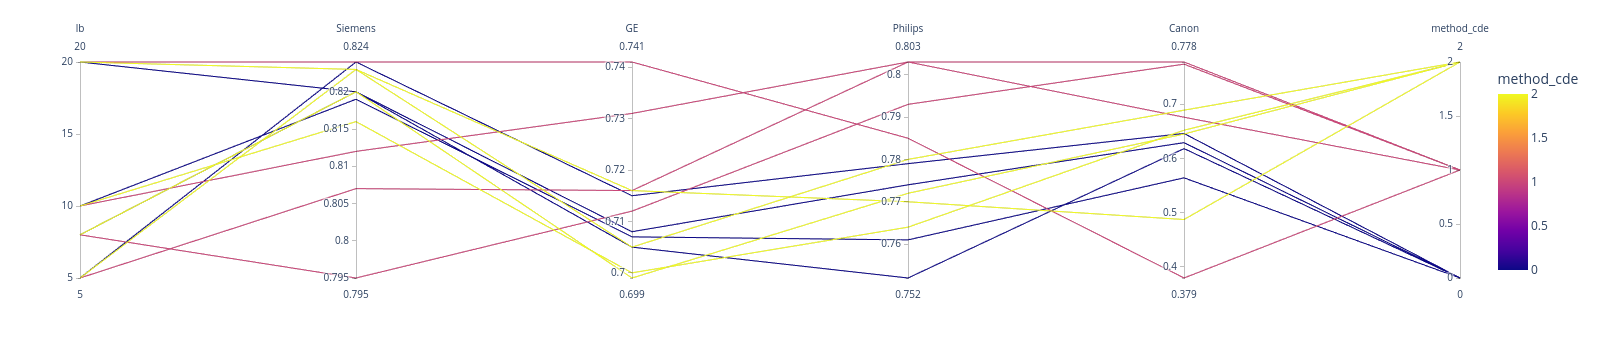

In [63]:
fig = px.parallel_coordinates(df_overview, color="method_cde", dimensions=['lb', 'Siemens', 'GE', 'Philips', 'Canon', 'method_cde'])
fig.show()

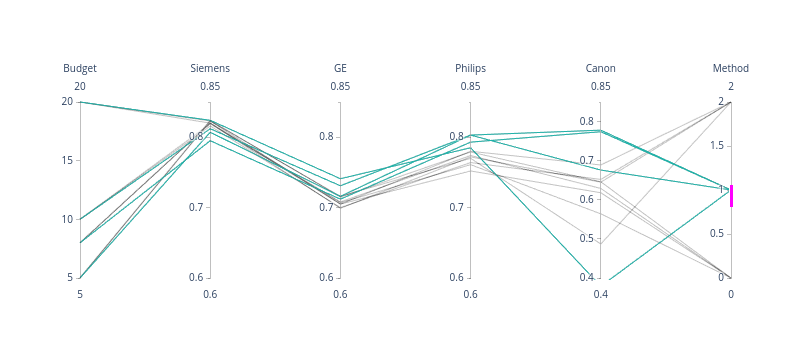

In [67]:
df_temp = df_overview

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df_temp['method_cde'],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = list([
             dict(range = [5, 20],
                label = 'Budget', values = df_temp['lb']),
            dict(range = [0.6, 0.85],
                label = 'Siemens', values = df_temp['Siemens']),
            dict(range = [0.6, 0.85],
                label = 'GE', values = df_temp['GE']),
            dict(range = [0.6, 0.85],
                label = 'Philips', values = df_temp['Philips']),
            dict(range = [0.4, 0.85],
                label = 'Canon', values = df_temp['Canon']),
            dict(range = [0, 2],
                label = 'Method', values = df_temp['method_cde']),
        ])
    )
)

fig.show()

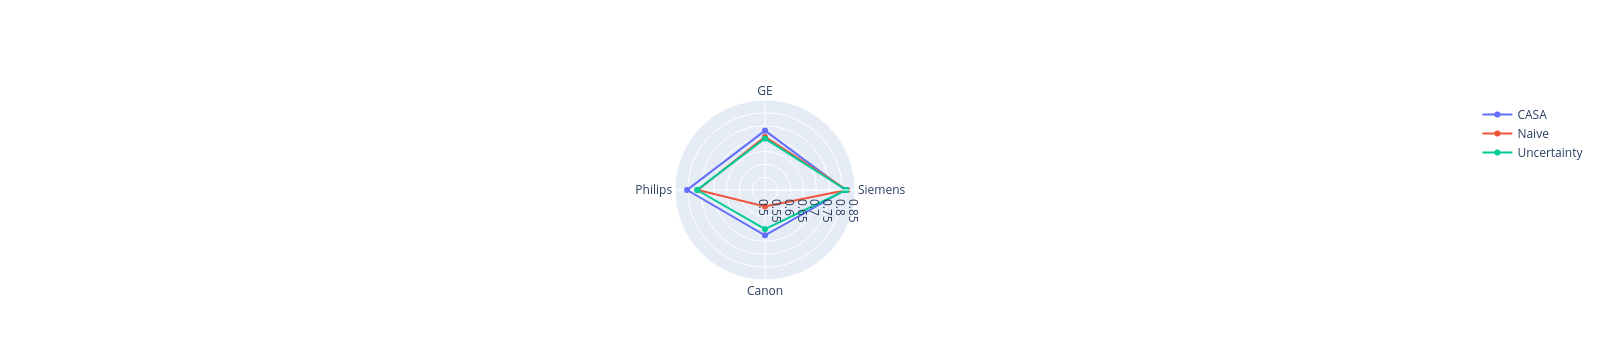

In [58]:
import plotly.graph_objects as go

categories = ['Siemens', 'GE', 'Philips', 'Canon', 'Siemens']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.812, 0.731, 0.803, 0.676, 0.812],
      theta=categories,
      name='CASA'
))
fig.add_trace(go.Scatterpolar(
      r=[0.819, 0.707, 0.761, 0.564, 0.819],
      theta=categories,
    name='Naive'
))

fig.add_trace(go.Scatterpolar(
      r=[0.816, 0.700, 0.764, 0.652, 0.816],
      theta=categories,
      name='Uncertainty',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0.5, 0.85]
    )),
  showlegend=True
)

fig.show()

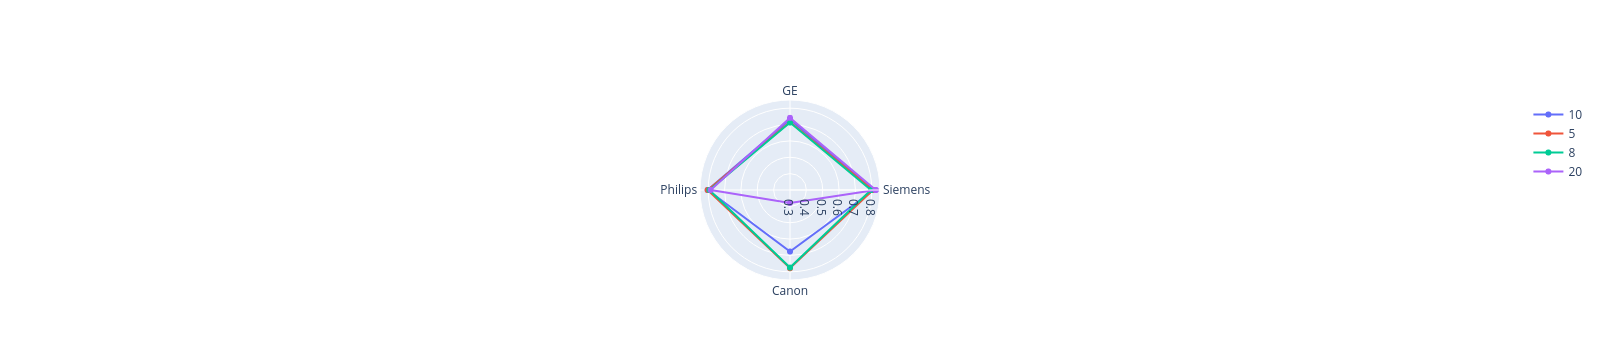

In [77]:
import plotly.graph_objects as go

categories = ['Siemens', 'GE', 'Philips', 'Canon', 'Siemens']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.812, 0.731, 0.803, 0.676, 0.812],
      theta=categories,
      name='10'
))
fig.add_trace(go.Scatterpolar(
      r=[0.807, 0.716, 0.803, 0.778, 0.807],
      theta=categories,
    name='5'
))

fig.add_trace(go.Scatterpolar(
      r=[0.795, 0.712, 0.793, 0.774, 0.795],
      theta=categories,
      name='8',
))

fig.add_trace(go.Scatterpolar(
      r=[0.824, 0.741, 0.785, 0.379, 0.824],
      theta=categories,
      name='20',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0.3, 0.85]
    )),
  showlegend=True
)

fig.show()

In [75]:
df_overview.loc[df_overview.method=='CASA']

scanner,BWT,Canon,FWT,GE,Philips,Siemens,method,lb,method_cde
model,,,,,,,,,
CASA/10,-0.006,0.676,0.086,0.731,0.803,0.812,CASA,10,1
CASA/20,0.002,0.379,0.019,0.741,0.785,0.824,CASA,20,1
CASA/5,-0.012,0.778,0.116,0.716,0.803,0.807,CASA,5,1
CASA/8,-0.017,0.774,0.119,0.712,0.793,0.795,CASA,8,1


In [72]:
df_overview.columns

Index(['BWT', 'Canon', 'FWT', 'GE', 'Philips', 'Siemens', 'method', 'lb',
       'method_cde'],
      dtype='object', name='scanner')

In [132]:
with open(f'../training_configs/cardiac_casa_10.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
rutils.get_expname(params['trainparams'])

'cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_0178195552'

In [28]:
ds = CardiacBatch('/project/catinous/cardiacslicessplitsingle.csv')

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv


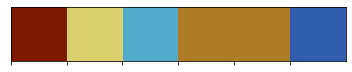

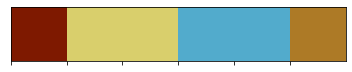

In [61]:
mapname='roma'
cm_data = np.loadtxt(f"/home/mperkonigg/Documents/ScientificColourMaps6/{mapname}/{mapname}.txt")
#colormap = LinearSegmentedColormap.from_list('scientific_cm', cm_data)
#x = np.linspace(0, 100, 25)[None, :]
#plt.imshow(x, aspect='auto',cmap=colormap)
#plt.axis('off')
#plt.show()
colormap = ListedColormap([[0.0, 0.0, 0.0], cm_data[0], cm_data[85],cm_data[180], cm_data[45], cm_data[20], cm_data[227]], name='scientific_cm')
matplotlib.cm.register_cmap(cmap=colormap, name='scientific_cm')
sns.set_palette('scientific_cm')
sns.palplot(sns.color_palette())
colormap = ListedColormap([np.hstack((cm_data[0], 0)), np.hstack((cm_data[85], 1)),np.hstack((cm_data[180], 1)), np.hstack((cm_data[45], 1))], name='scientific_cm_alpha')
matplotlib.cm.register_cmap(cmap=colormap, name='scientific_cm_alpha')
sns.palplot(sns.color_palette('scientific_cm_alpha'))

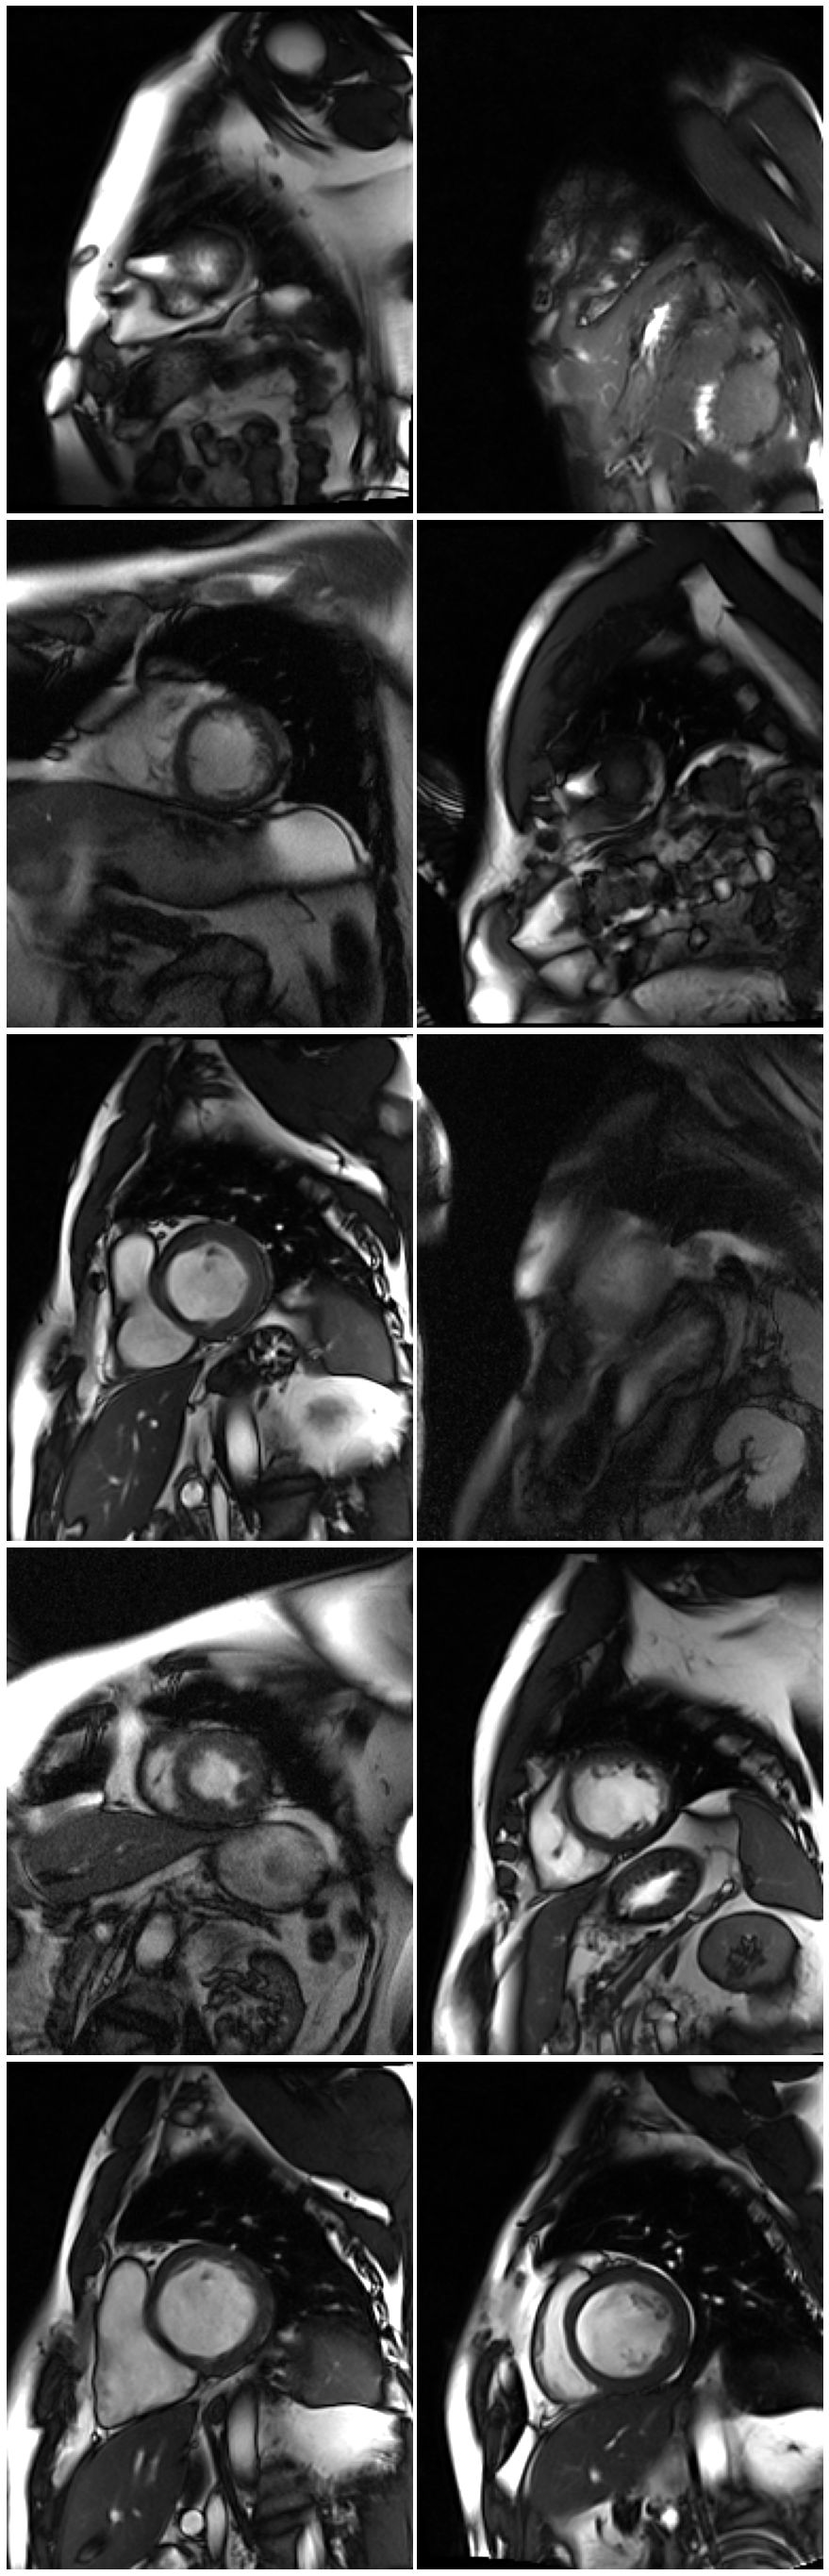

In [83]:
fig, ax = plt.subplots(5, 2, figsize=(15.5, 50))
plt.subplots_adjust(wspace=0.01, hspace=0.01)


for i in range(10):
    rand_pos = False
    
    while not rand_pos:
        idx = random.randint(0, len(ds))
        img, mask, _, _ = ds[idx]
        
        if torch.max(mask)!=0:
            rand_pos=True


    ax[int(i/2)][i%2].imshow(img[0], vmax=0.4)
    ax[int(i/2)][i%2].axis('off')
#ax.imshow(mask, cmap='scientific_cm', alpha=1.0)

448

In [67]:
import random